In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner

from impulse.base import PTSampler

# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

In [2]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

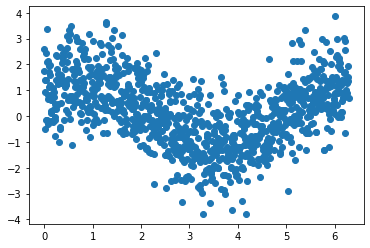

In [3]:
plt.scatter(x, data)

In [4]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [7]:
x0 = prior.initial_sample()
ndim = len(x0)

In [11]:
x0

array([1.31778214, 3.88149809, 2.8506852 ])

In [14]:
ntemps = 4
sampler = PTSampler(like, prior, [x0 for _ in range(ntemps)], tinf=True, num_samples=200_000, ntemps=ntemps, ncores=4, ret_chain=True)

2022-07-26 11:36:58.713 | INFO     | impulse.base:_setup_pool:223 - Setting up multiprocessing pool with 4 processes


In [15]:
chain = sampler.sample()

100%|██████████| 200/200 [00:38<00:00,  5.24it/s]
2022-07-26 11:37:37.856 | INFO     | impulse.base:_close_pool:248 - Worker pool closed.


In [16]:
burn = int(0.25 * chain.shape[0])
omega = np.median(chain[burn:, 0, 0])
a = np.median(chain[burn:, 1, 0])
phi = np.median(chain[burn:, 2, 0])

In [17]:
print(omega, omega_real)
print(a, a_real)
print(phi, phi_real)

1.1417601392475576 1.1399043730095655
1.2823590375561058 1.2848928436328255
0.5945520212442508 0.5895083743233566


In [18]:
with open('./chains/temp_data/temps.txt', 'r') as f:
    temps = np.loadtxt(f)

with open('./chains/temp_data/accept.txt', 'r') as f:
    accept = np.loadtxt(f)

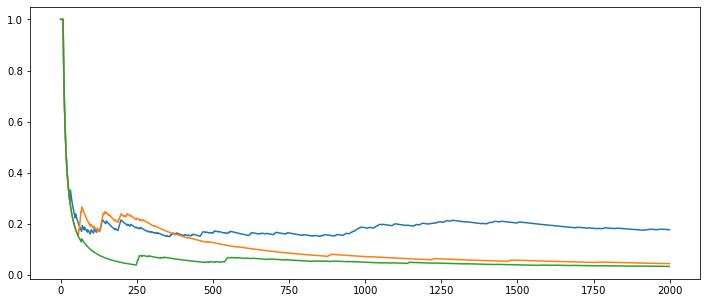

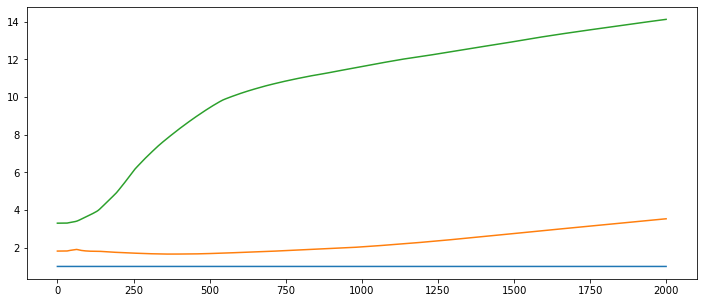

In [19]:
plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    # plt.plot(temps[:, ii])
    plt.plot(accept[:, ii])
plt.show()

plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    plt.plot(temps[:, ii])
    # plt.plot(accept[:, ii])
plt.show()

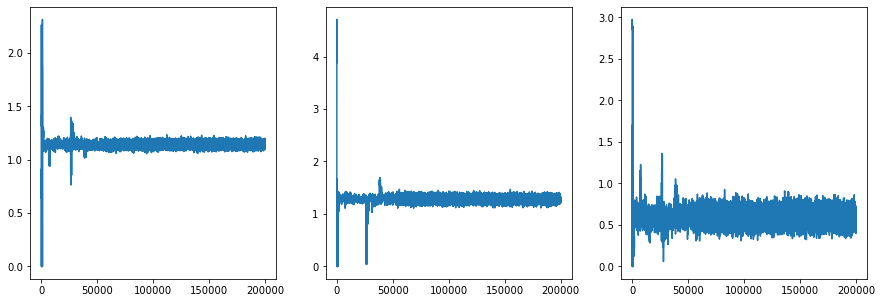

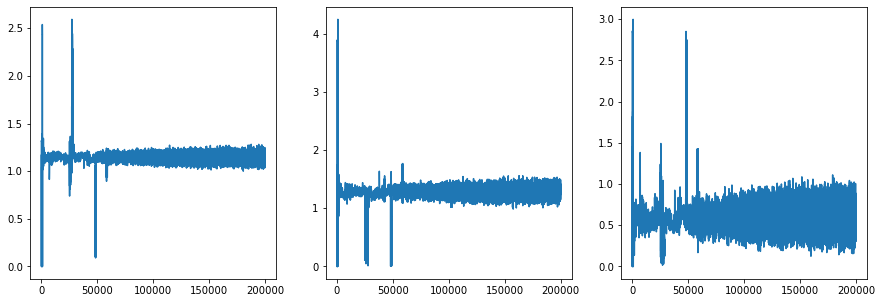

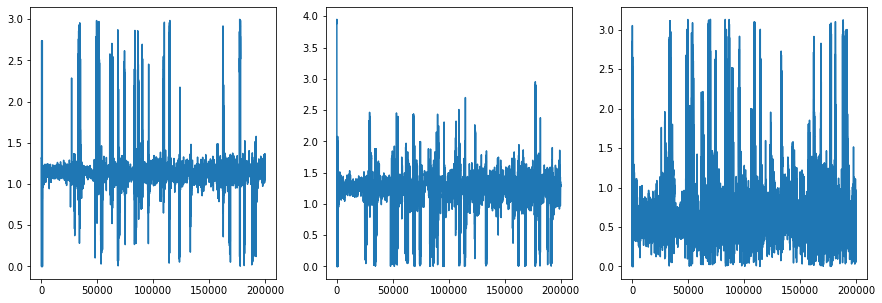

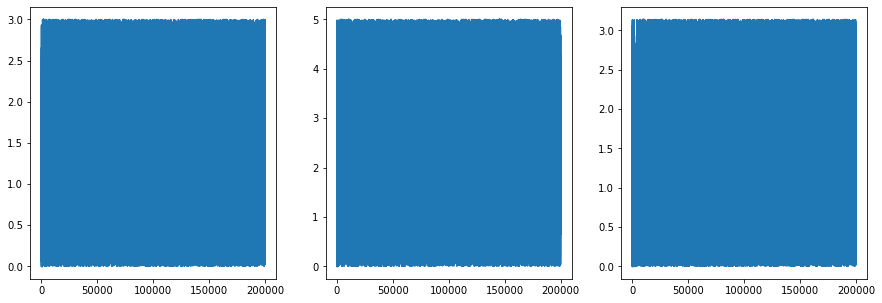

In [20]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[:, 0, ii])
    ax[1].plot(chain[:, 1, ii])
    ax[2].plot(chain[:, 2, ii])
    plt.show()

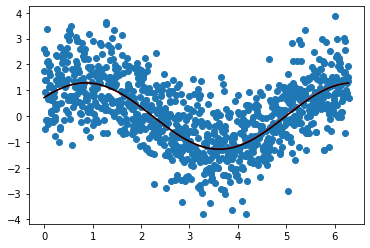

In [21]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

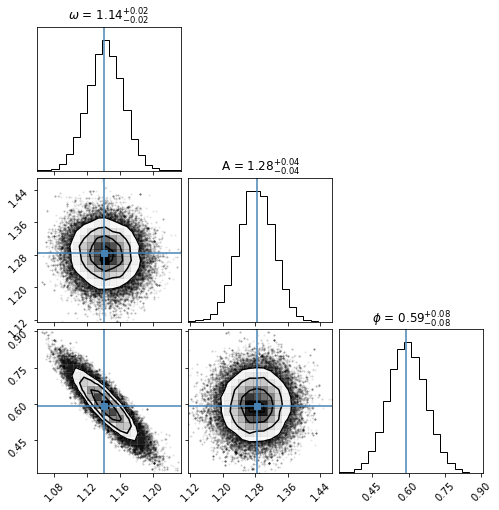

In [22]:
corner.corner(chain[2 * burn:, :, 0], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()

In [23]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

1.1399043730095655 1.2848928436328255 0.5895083743233566
1.1417601392475576 1.2823590375561058 0.5945520212442508
